In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#import seaborn as sns
import xlsxwriter
import scipy.stats as stats
import os,sys
import pickle
import random
import math
import time
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon, Rectangle
from collections import OrderedDict
import pandas as pd

In [2]:
county_shape_file = "data/basemap/cb_2018_us_county_5m"
state_shape_file = "data/basemap/cb_2018_us_state_5m"
data_file = "data/lur_no2/lur_no2_merged_with_pop_v5.csv"
AF_file = "odds_ratio_module/data/{}/PR_IR_AF.csv"

In [3]:
def calculate_trap_inc(row):
    population, pr, ir, af = row['population_x'], row['PR'], row['IR'], row['SAF']
    at_risk = population * (1- pr)
    trap_inc = at_risk*ir*af
    return trap_inc

def normalize(x, q1, q2, q3, q01, q85):
    if x >= q85:
        return q85
    elif q3<=x<q85:
        return q3
    elif x<=q01:
        return q01
    elif q1>x>q01:
        return q1
    else:
        return x
    

def fetch_data(year, col1, col2):
    df = pd.read_csv(data_file)
    df = df[df['year'] == year]
    
    af_df = pd.read_csv(AF_file.format(year))
    mdf = df.merge(af_df, on='state_code', how='left')
    mdf['incidences_trap'] = mdf.apply(calculate_trap_inc, axis=1)
    
    data_dict = {}
    for index, row in mdf.iterrows():
        data_dict[row[col1]] = row[col2]
    return mdf, data_dict

def get_county_and_colors(year, col1, col2):
    cmap = plt.get_cmap("bwr")
    df, data = fetch_data(year, col1, col2)
    return df, {i: cmap(j) for i, j in data.items()}

C:\Users\harsh\AppData\Local\Temp\ipykernel_2412\3679629719.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tdf)
C:\Users\harsh\AppData\Local\Temp\ipykernel_2412\3679629719.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tdf)
C:\Users\harsh\AppData\Local\Temp\ipykernel_2412\3679629719.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tdf)
C:\Users\harsh\AppData\Local\Temp\ipykernel_2412\3679629719.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tdf)
C:\Users\harsh\AppData\Local\Temp\ipykernel_2412\3679629719.py:37: FutureWarning: The frame.append method is dep

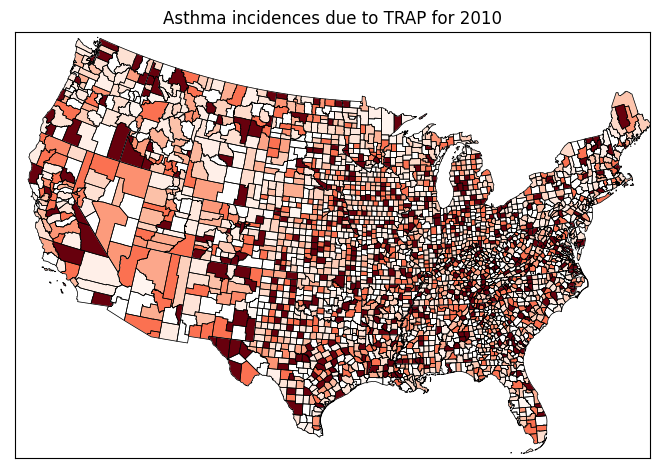

C:\Users\harsh\AppData\Local\Temp\ipykernel_2412\3679629719.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['fips'] = tdf['fips'].astype(str)


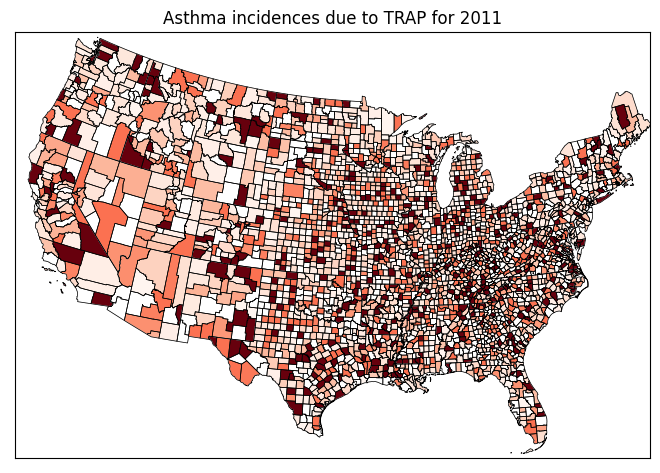

C:\Users\harsh\AppData\Local\Temp\ipykernel_2412\3679629719.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['fips'] = tdf['fips'].astype(str)


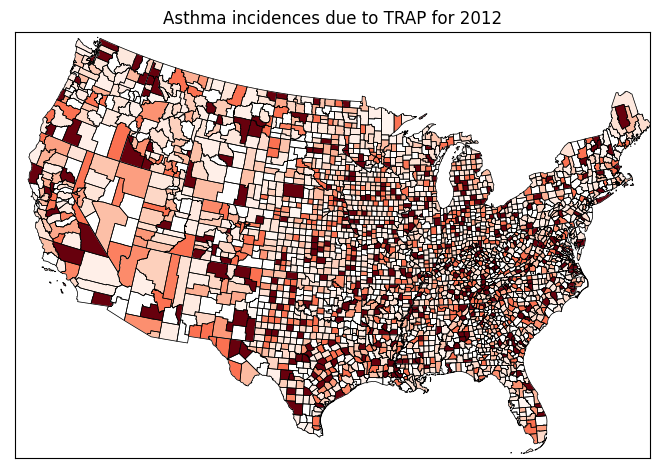

C:\Users\harsh\AppData\Local\Temp\ipykernel_2412\3679629719.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['fips'] = tdf['fips'].astype(str)


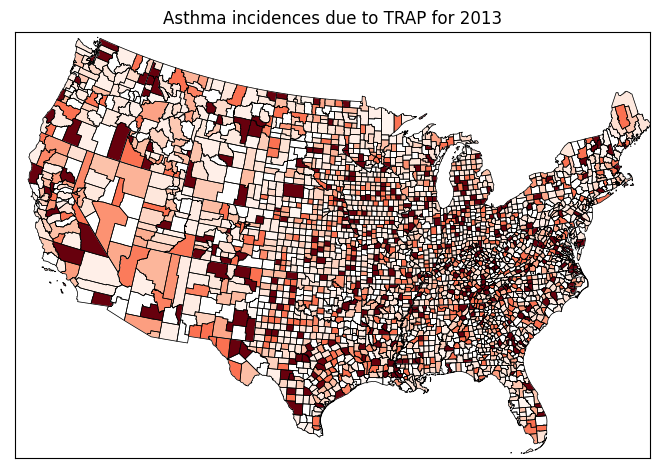

C:\Users\harsh\AppData\Local\Temp\ipykernel_2412\3679629719.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['fips'] = tdf['fips'].astype(str)


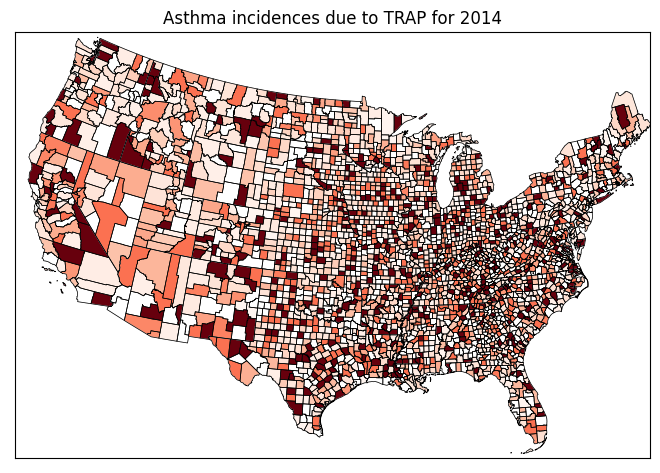

C:\Users\harsh\AppData\Local\Temp\ipykernel_2412\3679629719.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['fips'] = tdf['fips'].astype(str)


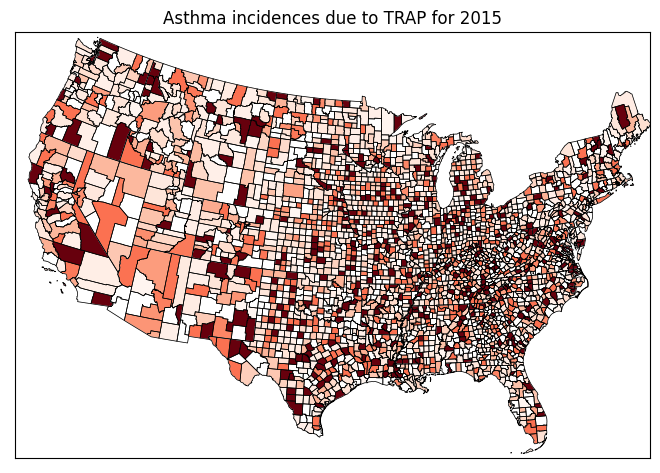

C:\Users\harsh\AppData\Local\Temp\ipykernel_2412\3679629719.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['fips'] = tdf['fips'].astype(str)


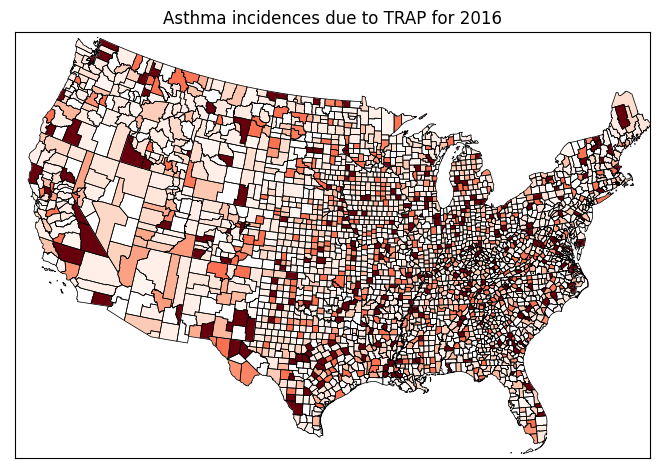

C:\Users\harsh\AppData\Local\Temp\ipykernel_2412\3679629719.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['fips'] = tdf['fips'].astype(str)


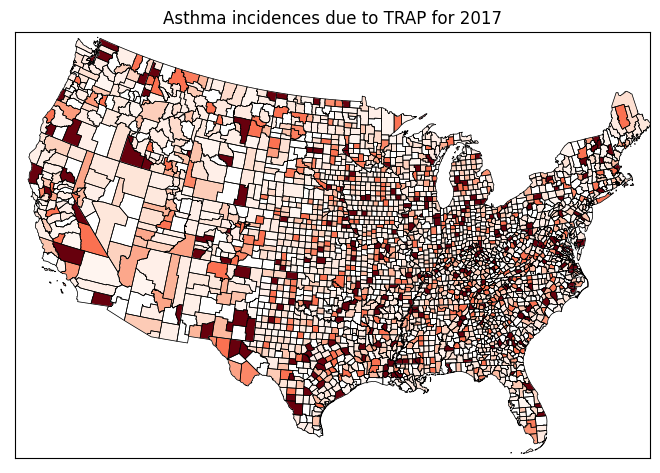

C:\Users\harsh\AppData\Local\Temp\ipykernel_2412\3679629719.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['fips'] = tdf['fips'].astype(str)


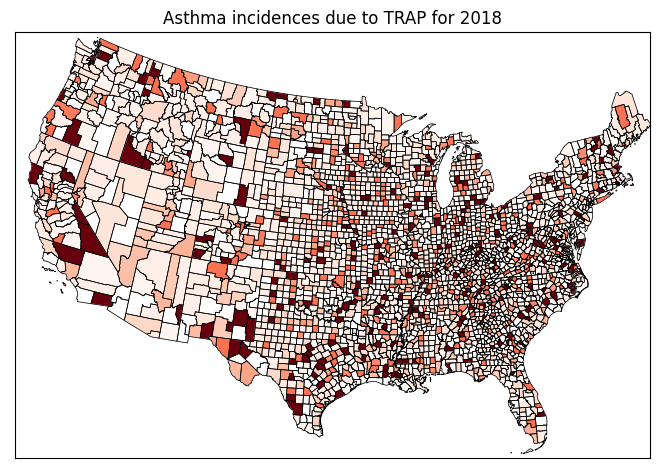

C:\Users\harsh\AppData\Local\Temp\ipykernel_2412\3679629719.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['fips'] = tdf['fips'].astype(str)


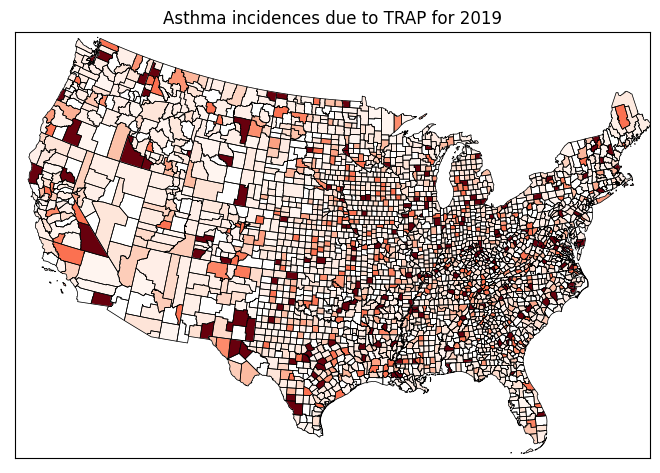

In [13]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def draw_us_map():
    # Set the lower left and upper right limits of the bounding box:
    lllon = -119
    urlon = -64
    lllat = 22.0
    urlat = 50.5
    # and calculate a centerpoint, needed for the projection:
    centerlon = float(lllon + urlon) / 2.0
    centerlat = float(lllat + urlat) / 2.0

    m = Basemap(resolution='i',  # crude, low, intermediate, high, full
                llcrnrlon = lllon, urcrnrlon = urlon,
                lon_0 = centerlon,
                llcrnrlat = lllat, urcrnrlat = urlat,
                lat_0 = centerlat,
                projection='tmerc')

    # Read state boundaries.
    shp_info = m.readshapefile(state_shape_file, 'states',
                               drawbounds=True, color='lightgrey')

    # Read county boundaries
    shp_info = m.readshapefile(county_shape_file,
                               'counties',
                               drawbounds=True)
    

    return m

if __name__ == "__main__":
    df = pd.DataFrame()
    for year in range(2010, 2020):
        tdf, data = get_county_and_colors(year, 'fips', 'pred_wght')
        df = df.append(tdf)
        l = df['incidences_trap'].tolist()
        q1, q2, q3, q01, q85 = np.percentile(l, 25), np.percentile(l, 50), np.percentile(l, 75), np.percentile(l, 10), np.percentile(l, 85)
        df["col_2_norm"] = df['incidences_trap'].apply(normalize, args=(q1, q2, q3, q01, q85))
        df["col_2_norm"] = (df["col_2_norm"] - df["col_2_norm"].min())/ (df["col_2_norm"].max() - df["col_2_norm"].min())
  

    cmap = plt.get_cmap('Reds')
    for year in range(2010, 2020):
        m = draw_us_map()
        tdf = df[df['year'] == year]
        ax = plt.gca() 
        for index, county in enumerate(m.counties_info):
            fips = "{}{}".format(county.get('STATEFP'), county.get('COUNTYFP'))
            tdf['fips'] = tdf['fips'].astype(str)
            try:
                color = tdf.loc[tdf["fips"] == fips, "col_2_norm"].item()
            except:
                color = np.nan
            shapenum = county.get('SHAPENUM')
            countyseg = m.counties[shapenum-1]
            if not pd.isna(color):
                poly = Polygon(countyseg, facecolor=cmap(color))  # edgecolor="white"
                ax.add_patch(poly)    

        plt.title('Asthma incidences due to TRAP for {}'.format(year))
        # Get rid of some of the extraneous whitespace matplotlib loves to use.
        plt.tight_layout(pad=0, w_pad=0, h_pad=0)
        plt.savefig("output_images/basemap_trap/{}.png".format(year), bbox_inches='tight')
        plt.show()

In [ ]:
tdf.loc[df["fips"] == fips, "col_2_norm"].item()


In [8]:
df

,fips,state_code,year,population_x,pollutant,pred_wght_x,state_abbr,lat,lon,pred_wght_y,pred_wght,population_y,PR,at_risk,incidence_cases,AC,IR,SAF,incidences_trap,col_2_norm
0,1001,1,2010,14541,no2,3.981267,AL,32.500383,-86.494186,NaN,7.484783,1130433,0.114040,1.001519e+06,10120.814187,1012.840573,0.010105,0.100075,13.028384,0.338882
1,1003,1,2010,42046,no2,2.515528,AL,30.548923,-87.762466,NaN,4.729192,1130433,0.114040,1.001519e+06,10120.814187,1012.840573,0.010105,0.100075,37.672197,1.000000
2,1005,1,2010,5972,no2,2.476618,AL,31.844037,-85.309929,NaN,4.656041,1130433,0.114040,1.001519e+06,10120.814187,1012.840573,0.010105,0.100075,5.350767,0.127138
3,1007,1,2010,5148,no2,2.495233,AL,33.030918,-87.127655,NaN,4.691039,1130433,0.114040,1.001519e+06,10120.814187,1012.840573,0.010105,0.100075,4.612483,0.106776
4,1009,1,2010,14090,no2,3.584228,AL,33.955246,-86.591402,NaN,6.738349,1130433,0.114040,1.001519e+06,10120.814187,1012.840573,0.010105,0.100075,12.624299,0.327737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,56,2019,10968,NaN,NaN,NaN,NaN,NaN,4.888597,9.190563,133734,0.073197,1.239450e+05,767.220536,61.692863,0.006190,0.080411,5.059651,0.119109
3138,56039,56,2019,4200,NaN,NaN,NaN,NaN,NaN,2.188841,4.115021,133734,0.073197,1.239450e+05,767.220536,61.692863,0.006190,0.080411,1.937503,0.037542
3139,56041,56,2019,5752,NaN,NaN,NaN,NaN,NaN,3.686500,6.930620,133734,0.073197,1.239450e+05,767.220536,61.692863,0.006190,0.080411,2.653456,0.052747
3140,56043,56,2019,1784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133734,0.073197,1.239450e+05,767.220536,61.692863,0.006190,0.080411,0.822977,0.037542


{'whiskers': [<matplotlib.lines.Line2D at 0x27eaa59e6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x27eaa59ec70>,
 'boxes': [<matplotlib.lines.Line2D at 0x27eaa59e520>],
 'medians': [<matplotlib.lines.Line2D at 0x27ea9672250>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ea9672550>],
 'means': []}

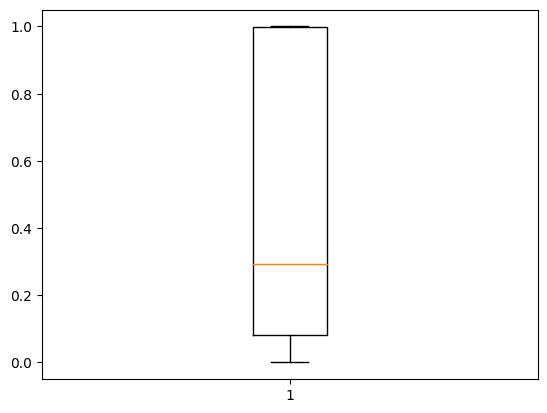

In [211]:
plt.boxplot([i for i in df['col_2_norm'].tolist() if not pd.isna(i)])

In [42]:
df = pd.read_csv('data/ambient_no2/daily_42602_2018.csv')

In [44]:
def get_county_fips(x):
    x = str(x)
    if len(x) == 1:
        return "00{}".format(x)
    elif len(x) == 2:
        return "0{}".format(x)
    else:
        return x

df['county_fips'] = df['County Code'].apply(get_county_fips)
df['STATE'] = df['State Code'].astype(str)
df['fips'] = df['STATE'] + df['county_fips']

In [47]:
len(df['fips'].unique())

260